### Data Loading

In [268]:
import pandas as pd
import glob

# Loading all CSV files matching the pattern "season-*.csv"
files = glob.glob("data/season-*.csv")

dfs = []

for file in files:
     # Reading each season file
    df = pd.read_csv(file)
    
    # Extracting the season name from the filename
    season = file.split("season-")[1].split(".csv")[0]
    # Adding season as a new column
    df["Season"] = season  
    # Storing this DataFrame
    dfs.append(df)
# Combining all season DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)
# Saving merged dataset for reproducibility
merged_df.to_csv("data/serie_a_merged.csv", index=False)
# Reloading the merged dataset
serie_a_df = pd.read_csv("data/serie_a_merged.csv")
serie_a_df




,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,18/08/18,Chievo,Juventus,2,3,A,1,1,D,NaN,...,11,7,9,0,8,2,0,0,0,1819
1,18/08/18,Lazio,Napoli,1,2,A,1,1,D,NaN,...,6,8,5,4,7,0,0,0,0,1819
2,19/08/18,Bologna,Spal,0,1,A,0,0,D,NaN,...,5,16,11,7,0,4,2,1,0,1819
3,19/08/18,Empoli,Cagliari,2,0,H,1,0,H,NaN,...,5,19,19,6,6,3,3,0,0,1819
4,19/08/18,Parma,Udinese,2,2,D,1,0,H,NaN,...,6,10,13,4,5,2,2,0,0,1819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,26/05/24,Empoli,Roma,2,1,H,1,1,D,NaN,...,3,18,12,4,5,4,1,0,0,2324
2276,26/05/24,Frosinone,Udinese,0,1,A,0,0,D,NaN,...,5,6,13,11,1,0,2,0,0,2324
2277,26/05/24,Lazio,Sassuolo,1,1,D,0,0,D,NaN,...,3,15,11,5,3,3,1,0,0,2324
2278,26/05/24,Verona,Inter,2,2,D,2,2,D,NaN,...,11,17,8,9,3,1,1,0,0,2324


In [269]:
# loading the first five rows of the merged dataset
serie_a_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,18/08/18,Chievo,Juventus,2,3,A,1,1,D,NaN,...,11,7,9,0,8,2,0,0,0,1819
1,18/08/18,Lazio,Napoli,1,2,A,1,1,D,NaN,...,6,8,5,4,7,0,0,0,0,1819
2,19/08/18,Bologna,Spal,0,1,A,0,0,D,NaN,...,5,16,11,7,0,4,2,1,0,1819
3,19/08/18,Empoli,Cagliari,2,0,H,1,0,H,NaN,...,5,19,19,6,6,3,3,0,0,1819
4,19/08/18,Parma,Udinese,2,2,D,1,0,H,NaN,...,6,10,13,4,5,2,2,0,0,1819


In [270]:
# The 'Referee' column contains only missing values, so I remove it
serie_a_df.drop(columns=["Referee"], inplace=True)

# Showing the head again to confirm the column was removed
serie_a_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,18/08/18,Chievo,Juventus,2,3,A,1,1,D,7,...,11,7,9,0,8,2,0,0,0,1819
1,18/08/18,Lazio,Napoli,1,2,A,1,1,D,9,...,6,8,5,4,7,0,0,0,0,1819
2,19/08/18,Bologna,Spal,0,1,A,0,0,D,8,...,5,16,11,7,0,4,2,1,0,1819
3,19/08/18,Empoli,Cagliari,2,0,H,1,0,H,9,...,5,19,19,6,6,3,3,0,0,1819
4,19/08/18,Parma,Udinese,2,2,D,1,0,H,9,...,6,10,13,4,5,2,2,0,0,1819


### B. Exploratory Data Analysis

In [271]:
# Printing  dataset information: shape and column names
print("Dataset shape:", serie_a_df.shape)
print("Columns:", serie_a_df.columns.tolist())
# Displaying data types, non-null counts, and memory usage
serie_a_df.info()
# Generating summary statistics for all numerical columns
serie_a_df.describe()


Dataset shape: (2280, 22)
Columns: ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'Season']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2280 non-null   object
 1   HomeTeam  2280 non-null   object
 2   AwayTeam  2280 non-null   object
 3   FTHG      2280 non-null   int64 
 4   FTAG      2280 non-null   int64 
 5   FTR       2280 non-null   object
 6   HTHG      2280 non-null   int64 
 7   HTAG      2280 non-null   int64 
 8   HTR       2280 non-null   object
 9   HS        2280 non-null   int64 
 10  AS        2280 non-null   int64 
 11  HST       2280 non-null   int64 
 12  AST       2280 non-null   int64 
 13  HF        2280 non-null   int64 
 14  AF        2280 non-null   int64 
 15  HC        2280 non-null   int64 
 16  AC    

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
count,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000
mean,1.513596,1.288158,0.659649,0.564035,12.688158,10.691667,5.211404,4.431140,12.845614,13.210965,5.404386,4.530702,2.158333,2.453070,0.098684,0.111842,2071.500000
std,1.248356,1.160200,0.806372,0.750793,5.131756,4.615075,2.783555,2.528399,3.777933,3.962169,2.999426,2.682223,1.345501,1.394998,0.325052,0.338077,172.528177
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1819.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.750000,3.000000,3.000000,10.000000,10.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1920.000000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,5.000000,4.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2071.500000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,7.000000,6.000000,15.000000,16.000000,7.000000,6.000000,3.000000,3.000000,0.000000,0.000000,2223.000000
max,8.000000,7.000000,5.000000,5.000000,46.000000,31.000000,18.000000,16.000000,28.000000,29.000000,20.000000,17.000000,7.000000,8.000000,3.000000,2.000000,2324.000000


In [272]:
# Checking for any remaining missing values in the dataset
serie_a_df.isna().sum()


Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
Season      0
dtype: int64

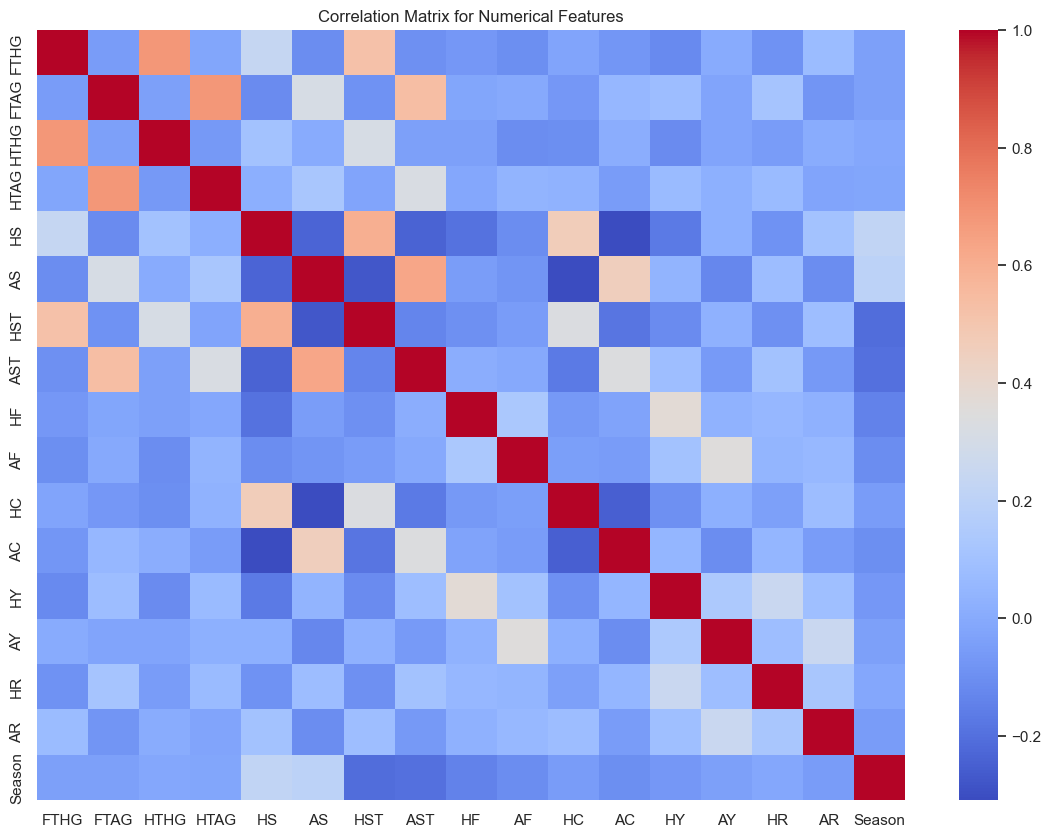

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
# Selecting all numeric columns for correlation analysis
numeric_cols = serie_a_df.select_dtypes(include=["int64", "float64"])
# Plotting a correlation heatmap for numerical features
plt.figure(figsize=(14,10))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Features")
plt.show()


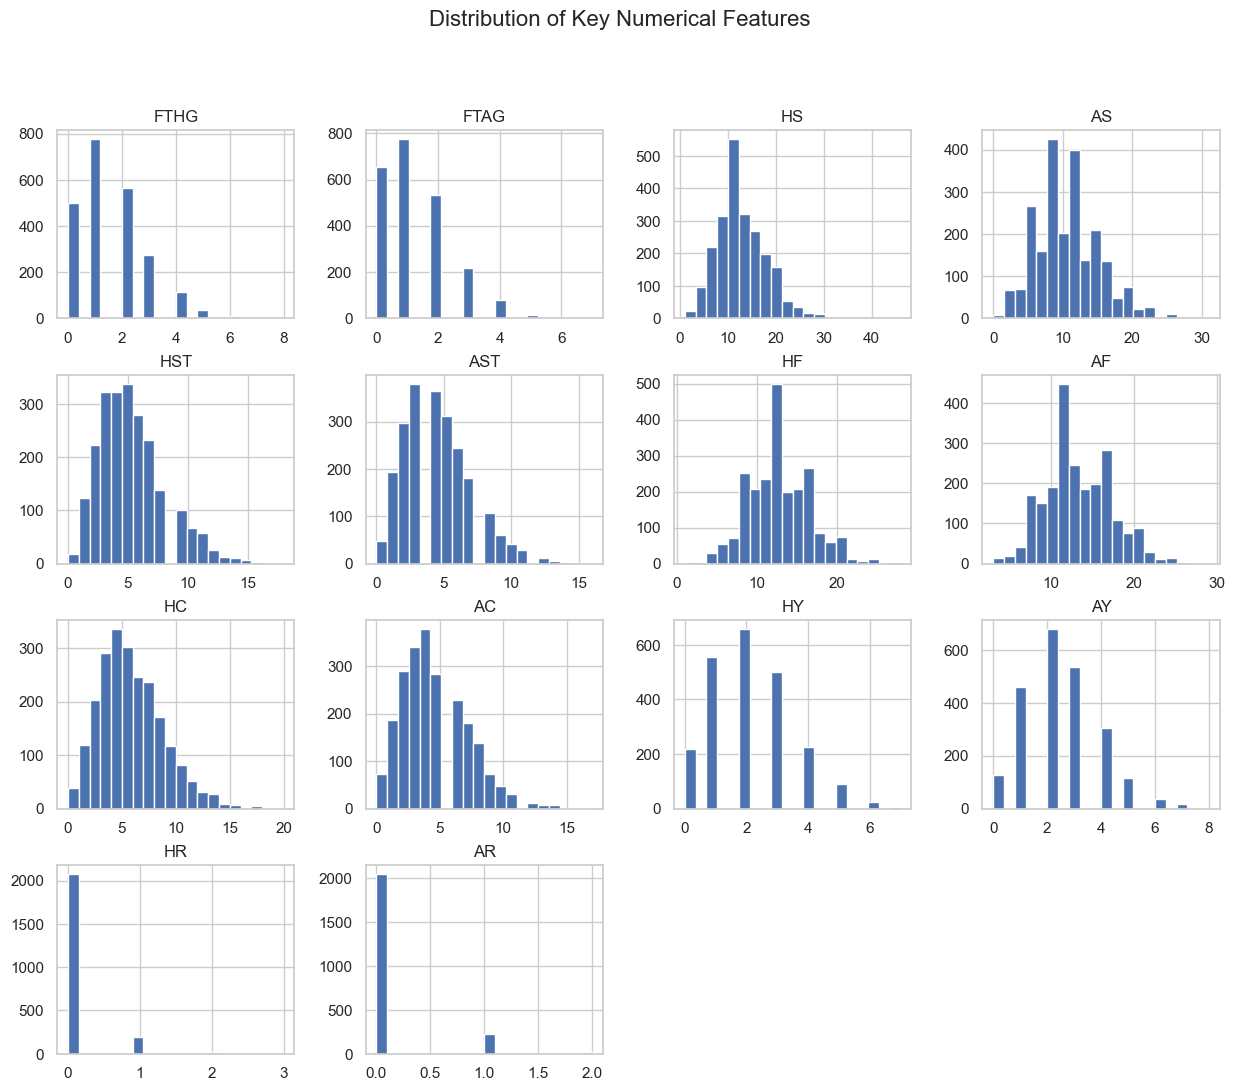

In [274]:
# Defining important numerical columns for visualization
numeric_cols = ["FTHG","FTAG","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR"]

# Plotting histograms to show the distribution of key numerical features
serie_a_df[numeric_cols].hist(figsize=(15,12), bins=20)
plt.suptitle("Distribution of Key Numerical Features", fontsize=16)
plt.show()


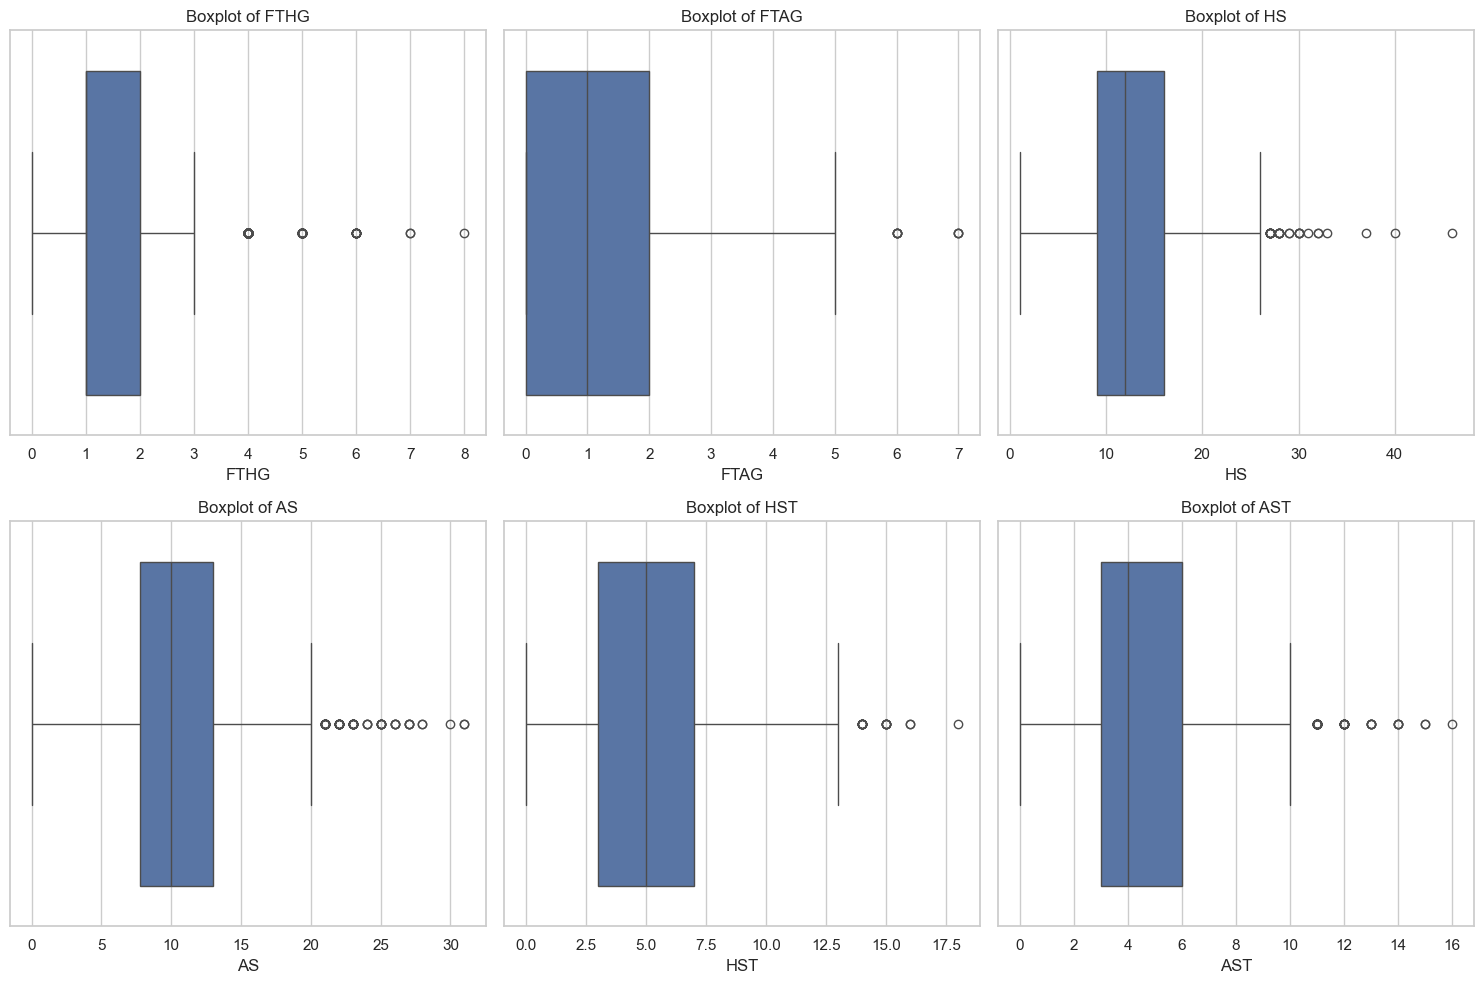

In [275]:
# Createing boxplots to check for outliers in selected columns
plt.figure(figsize=(15,10))
for i, col in enumerate(["FTHG","FTAG","HS","AS","HST","AST"]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=serie_a_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


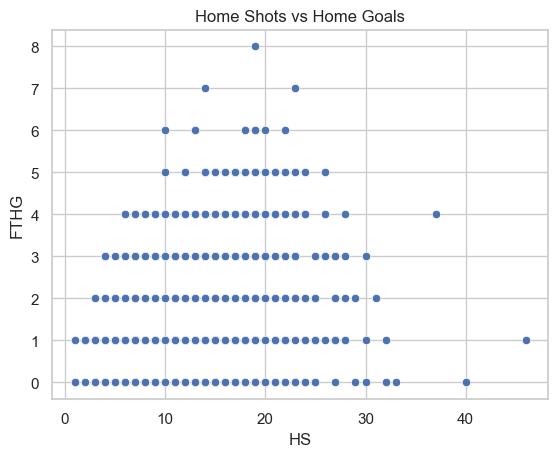

In [276]:
# Scatter plot to show the relationship between home shots and home goals
sns.scatterplot(x=serie_a_df["HS"], y=serie_a_df["FTHG"])
plt.title("Home Shots vs Home Goals")
plt.show()


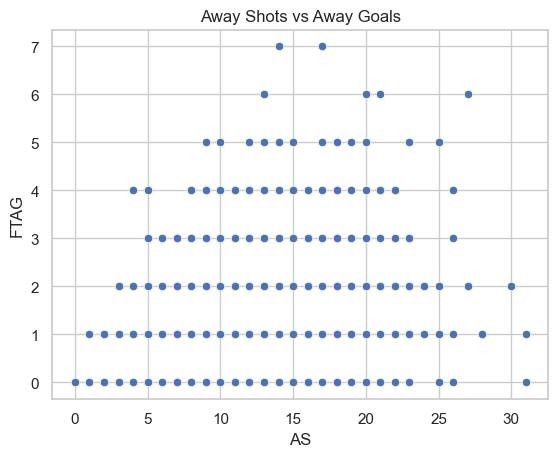

In [277]:
# Scatter plot to show the relationship between away shots and away goals
sns.scatterplot(x=serie_a_df["AS"], y=serie_a_df["FTAG"])
plt.title("Away Shots vs Away Goals")
plt.show()


### C. Data Preparation.

In [278]:
# Checking again for missing values in the dataset
serie_a_df.isna().sum()


Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
Season      0
dtype: int64

In [279]:
# serie_a_df["Referee"] = serie_a_df["Referee"].fillna("Unknown")
# I choose other method, you can choose this one if you want. comment drop method of referee, and uncomment this one if you choose this code

In [280]:
# Identifying numeric columns to check for invalid negative values
numeric_cols = serie_a_df.select_dtypes(include=["int64", "float64"]).columns
# Loopping through each numeric column to detect incorrect negative numbers
for col in numeric_cols:
    if (serie_a_df[col] < 0).any():
        print("Error detected in", col)


In [281]:
# Converting the Date column from string format to datetime format
serie_a_df["Date"] = pd.to_datetime(serie_a_df["Date"], format="%d/%m/%y")
serie_a_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,2018-08-18,Chievo,Juventus,2,3,A,1,1,D,7,...,11,7,9,0,8,2,0,0,0,1819
1,2018-08-18,Lazio,Napoli,1,2,A,1,1,D,9,...,6,8,5,4,7,0,0,0,0,1819
2,2018-08-19,Bologna,Spal,0,1,A,0,0,D,8,...,5,16,11,7,0,4,2,1,0,1819
3,2018-08-19,Empoli,Cagliari,2,0,H,1,0,H,9,...,5,19,19,6,6,3,3,0,0,1819
4,2018-08-19,Parma,Udinese,2,2,D,1,0,H,9,...,6,10,13,4,5,2,2,0,0,1819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2024-05-26,Empoli,Roma,2,1,H,1,1,D,17,...,3,18,12,4,5,4,1,0,0,2324
2276,2024-05-26,Frosinone,Udinese,0,1,A,0,0,D,21,...,5,6,13,11,1,0,2,0,0,2324
2277,2024-05-26,Lazio,Sassuolo,1,1,D,0,0,D,8,...,3,15,11,5,3,3,1,0,0,2324
2278,2024-05-26,Verona,Inter,2,2,D,2,2,D,18,...,11,17,8,9,3,1,1,0,0,2324


In [282]:
# Create engineered features to enhance predictive power
serie_a_df["GoalDiff"] = serie_a_df["FTHG"] - serie_a_df["FTAG"]
serie_a_df["TotalGoals"] = serie_a_df["FTHG"] + serie_a_df["FTAG"]
serie_a_df["ShotDiff"] = serie_a_df["HS"] - serie_a_df["AS"]
serie_a_df["CardDiff"] = (serie_a_df["HY"] + serie_a_df["HR"]) - (serie_a_df["AY"] + serie_a_df["AR"])
serie_a_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AC,HY,AY,HR,AR,Season,GoalDiff,TotalGoals,ShotDiff,CardDiff
0,2018-08-18,Chievo,Juventus,2,3,A,1,1,D,7,...,8,2,0,0,0,1819,-1,5,-16,2
1,2018-08-18,Lazio,Napoli,1,2,A,1,1,D,9,...,7,0,0,0,0,1819,-1,3,-2,0
2,2018-08-19,Bologna,Spal,0,1,A,0,0,D,8,...,0,4,2,1,0,1819,-1,1,-2,3
3,2018-08-19,Empoli,Cagliari,2,0,H,1,0,H,9,...,6,3,3,0,0,1819,2,2,-3,0
4,2018-08-19,Parma,Udinese,2,2,D,1,0,H,9,...,5,2,2,0,0,1819,0,4,-7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2024-05-26,Empoli,Roma,2,1,H,1,1,D,17,...,5,4,1,0,0,2324,1,3,2,3
2276,2024-05-26,Frosinone,Udinese,0,1,A,0,0,D,21,...,1,0,2,0,0,2324,-1,1,11,-2
2277,2024-05-26,Lazio,Sassuolo,1,1,D,0,0,D,8,...,3,3,1,0,0,2324,0,2,0,2
2278,2024-05-26,Verona,Inter,2,2,D,2,2,D,18,...,3,1,1,0,0,2324,0,4,3,0


In [283]:
# Converting match result into categorical labels for classification
serie_a_df["result"] = serie_a_df["FTR"].map({
    "H": "home_win",
    "A": "away_win",
    "D": "draw"
})
serie_a_df


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HY,AY,HR,AR,Season,GoalDiff,TotalGoals,ShotDiff,CardDiff,result
0,2018-08-18,Chievo,Juventus,2,3,A,1,1,D,7,...,2,0,0,0,1819,-1,5,-16,2,away_win
1,2018-08-18,Lazio,Napoli,1,2,A,1,1,D,9,...,0,0,0,0,1819,-1,3,-2,0,away_win
2,2018-08-19,Bologna,Spal,0,1,A,0,0,D,8,...,4,2,1,0,1819,-1,1,-2,3,away_win
3,2018-08-19,Empoli,Cagliari,2,0,H,1,0,H,9,...,3,3,0,0,1819,2,2,-3,0,home_win
4,2018-08-19,Parma,Udinese,2,2,D,1,0,H,9,...,2,2,0,0,1819,0,4,-7,0,draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2024-05-26,Empoli,Roma,2,1,H,1,1,D,17,...,4,1,0,0,2324,1,3,2,3,home_win
2276,2024-05-26,Frosinone,Udinese,0,1,A,0,0,D,21,...,0,2,0,0,2324,-1,1,11,-2,away_win
2277,2024-05-26,Lazio,Sassuolo,1,1,D,0,0,D,8,...,3,1,0,0,2324,0,2,0,2,draw
2278,2024-05-26,Verona,Inter,2,2,D,2,2,D,18,...,1,1,0,0,2324,0,4,3,0,draw


In [284]:
# Defineing the features that will be used for model training
feature_cols = [
    "HS", "AS", "HST", "AST",
    "HF", "AF", "HC", "AC",
    "HY", "AY", "HR", "AR",
    "ShotDiff", "CardDiff"
]

target_col = "result"

# Defining the target variable
target_col = "result"


In [ ]:
# Making a copy of the dataset so that original data remains unchanged
df_clean = serie_a_df.copy()
# Function to remove outliers using the Interquartile Range (IQR) method
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
# Keep only rows where the value is within acceptable bounds
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
# Applying the IQR outlier removal on selected model features
df_clean = remove_outliers_iqr(df_clean, feature_cols)
# Display the change in dataset size after removing outliers
print("Original rows:", len(serie_a_df))
print("After IQR Outlier Removal:", len(df_clean))

Original rows: 2280
After IQR Outlier Removal: 1636


In [246]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# All selected features are numerical, so only scaling is applied
numeric_features = feature_cols  
# Setting up preprocessing pipeline: scale all numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ]
)





In [285]:
from sklearn.model_selection import train_test_split
# Splitting features and target into training and testing sets
X = df_clean[feature_cols]
y = df_clean[target_col]


# Stratified split ensures class proportions stay balanced in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)


### D. Model training

In [286]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV




In [287]:
# Includes preprocessing (scaling) + model in one workflow
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])
# Training logistic regression model
log_reg_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [288]:

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

# Training random forest model using default hyperparameters first
rf_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [289]:
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier())
])
# Trainnig KNN model
knn_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [298]:
# Hyperparameter Tuning for Random Forest
rf_param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1
)

# Performing grid search tuning
rf_grid.fit(X_train, y_train)

# Best tuned Random Forest model
best_rf = rf_grid.best_estimator_
best_rf


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
#Hyperparameter Tuning for KNN
knn_param_grid = {
    "model__n_neighbors": [3, 5, 7, 11, 15],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]  # Manhattan vs Euclidean
}

knn_grid = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1
)
# Performing tuning for KNN

knn_grid.fit(X_train, y_train)
# Best tuned KNN model
best_knn = knn_grid.best_estimator_
best_knn


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HS', 'AS', 'HST', 'AST',
                                                   'HF', 'AF', 'HC', 'AC', 'HY',
                                                   'AY', 'HR', 'AR', 'ShotDiff',
                                                   'CardDiff'])])),
                ('model',
                 KNeighborsClassifier(n_neighbors=15, weights='distance'))])


### E. Model evaluation

In [300]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [293]:
# Helper function to evaluate a classification model
def evaluate_model(name, model, X_test, y_test):
    print(f"\n====== {name} ======\n")

     # Generating predictions on the test set
    
    y_pred = model.predict(X_test)

    # Calculating and printing accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    # Printing detailed classification report 
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

      # Computeing and plotting confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    # Returning accuracy so we can store it later
    return acc



====== Logistic Regression ======

Accuracy: 0.5792682926829268

Classification Report:
              precision    recall  f1-score   support

    away_win       0.56      0.66      0.60        99
        draw       0.58      0.17      0.27        86
    home_win       0.59      0.77      0.67       143

    accuracy                           0.58       328
   macro avg       0.58      0.53      0.51       328
weighted avg       0.58      0.58      0.54       328



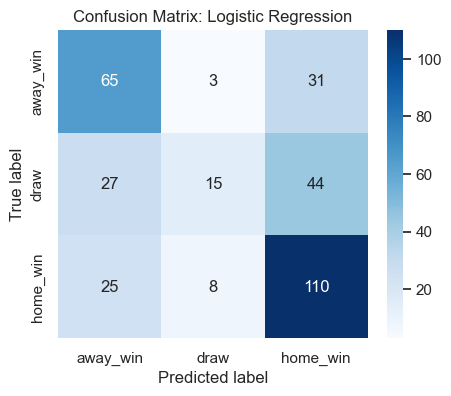


====== Random Forest (Tuned) ======

Accuracy: 0.5304878048780488

Classification Report:
              precision    recall  f1-score   support

    away_win       0.53      0.54      0.53        99
        draw       0.44      0.20      0.27        86
    home_win       0.55      0.73      0.63       143

    accuracy                           0.53       328
   macro avg       0.51      0.49      0.48       328
weighted avg       0.51      0.53      0.51       328



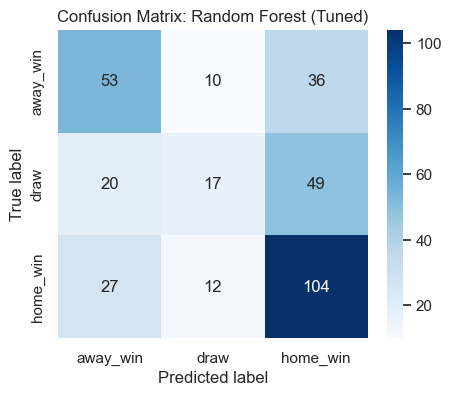


====== KNN (Tuned) ======

Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

    away_win       0.52      0.47      0.50        99
        draw       0.26      0.14      0.18        86
    home_win       0.55      0.73      0.63       143

    accuracy                           0.50       328
   macro avg       0.44      0.45      0.44       328
weighted avg       0.46      0.50      0.47       328



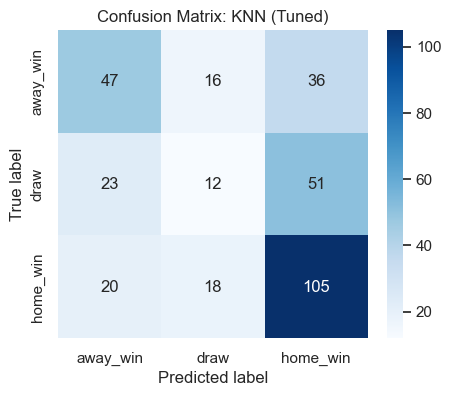

In [301]:
# Evaluating all three models on the test set
acc_logreg = evaluate_model("Logistic Regression", log_reg_pipeline, X_test, y_test)
acc_rf     = evaluate_model("Random Forest (Tuned)", best_rf, X_test, y_test)
acc_knn    = evaluate_model("KNN (Tuned)", best_knn, X_test, y_test)


In [295]:
import pandas as pd
# Creating a comparison table with model names and their accuracies
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest (Tuned)", "KNN (Tuned)"],
    "Accuracy": [acc_logreg, acc_rf, acc_knn]
})
# Displaying the results table
results_df



,Model,Accuracy
0,Logistic Regression,0.579268
1,Random Forest (Tuned),0.530488
2,KNN (Tuned),0.500000


In [262]:
# Saveing evaluation results for use in the Streamlit app
results_df.to_csv("app/models/results.csv", index=False)

In [296]:
import joblib
# Storing all trained models in a dictionary for deployment
models = {
    "Random Forest (Best)": best_rf,
    "Logistic Regression": log_reg_pipeline,
    "KNN (Best)": best_knn
}
# Saving the models dictionary to a .pkl file for the Streamlit app to load
joblib.dump(models, "app/models/models_dict.pkl")
print("Saved models to app/models/models_dict.pkl")



Saved models to app/models/models_dict.pkl
